In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import random
import re

In [19]:
data = pd.read_csv('./dataset_diabetes/diabetic_data.csv')
print(data.shape)
data.columns

(101766, 50)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [20]:
data = data.replace('?', np.nan)

In [21]:
data['weight']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
101736    NaN
101737    NaN
101738    NaN
101739    NaN
101740    NaN
101741    NaN
101742    NaN
101743    NaN
101744    NaN
101745    NaN
101746    NaN
101747    NaN
101748    NaN
101749    NaN
101750    NaN
101751    NaN
101752    NaN
101753    NaN
101754    NaN
101755    NaN
101756    NaN
101757    NaN
101758    NaN
101759    NaN
101760    NaN
101761    NaN
101762    NaN
101763    NaN
101764    NaN
101765    NaN
Name: weight, Length: 101766, dtype: object

In [12]:
missing = data.isna().sum()/len(data) * 100

In [16]:
missing

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [18]:
missing[missing > 0]

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

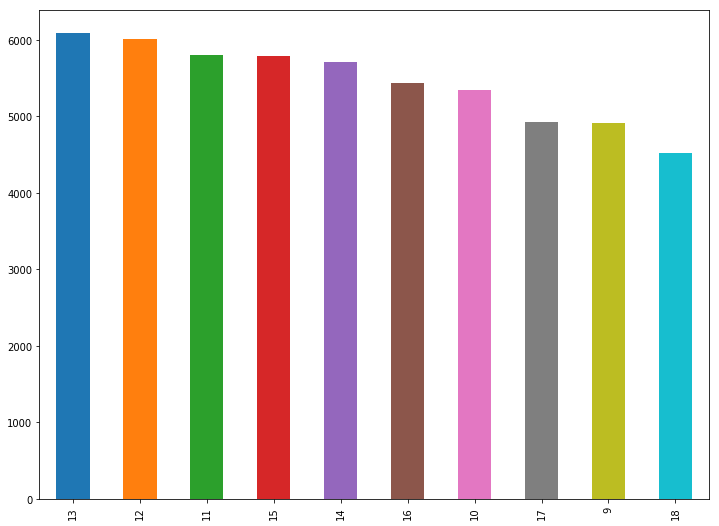

In [46]:
pd.value_counts(data['num_medications']).nlargest(10).plot.bar(figsize = (12,9))

In [25]:
pd.value_counts(data['glimepiride']).nlargest(15).plot.bar(figsize = (12,10))

ValueError: could not broadcast input array from shape (101766,50) into shape (101766)

In [28]:
data['target'] = list(map(lambda x: 0 if x == "NO" else 1 if x == "<30" else 0, data['readmitted']))

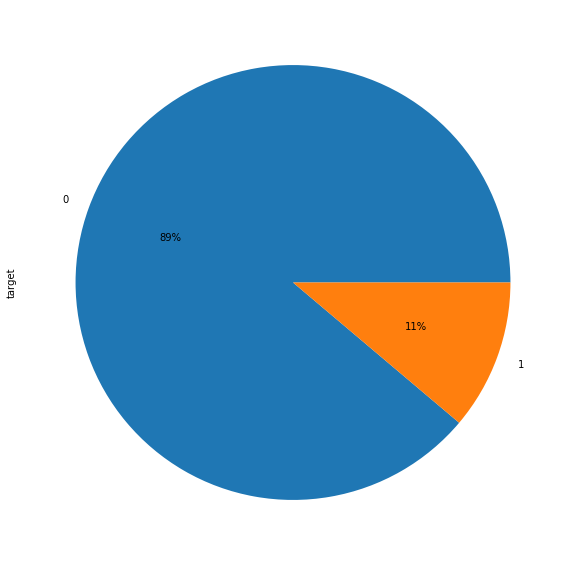

In [30]:
pd.value_counts(data['target']).plot.pie(figsize = (12,10),  autopct='%1.0f%%')

In [31]:
data['target'].value_counts()

0    90409
1    11357
Name: target, dtype: int64

In [39]:
data['number_inpatient'].value_counts()

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64